In [12]:
import numpy as np
import matplotlib.pyplot as plt
    

def lotka_volterra(N, alpha):
    np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * np.dot(alpha, N)
    return dNdt



def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)



def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values




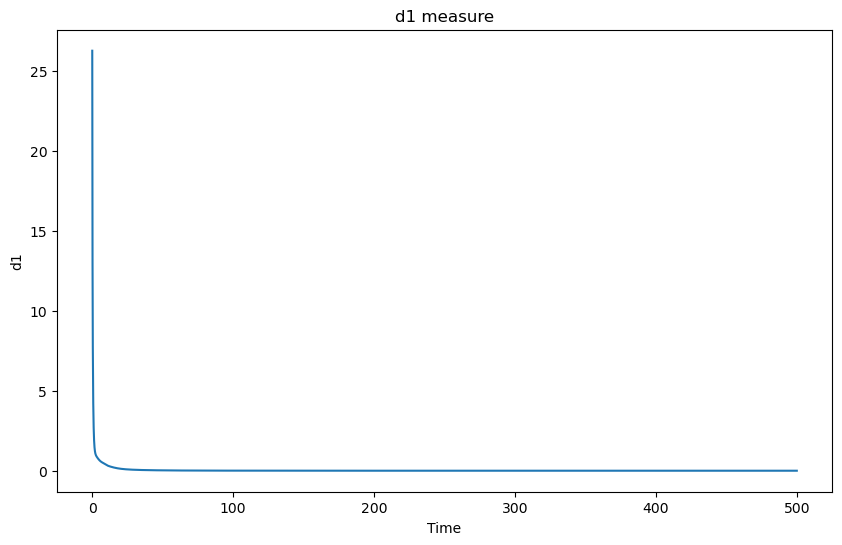

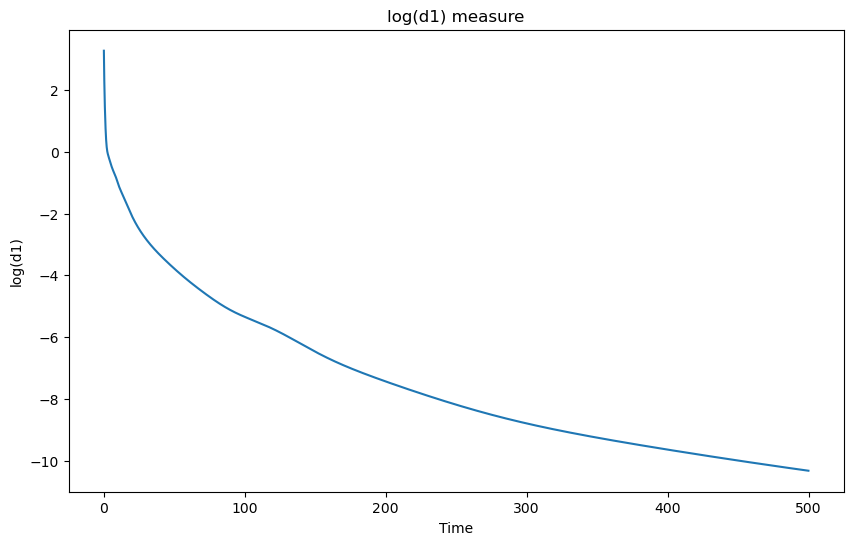

In [10]:
import numpy as np
from numpy import linalg as LA

d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    d1_values.append(d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, d1_values,)
plt.xlabel('Time')
plt.ylabel('d1')
plt.title('d1 measure')
plt.show()

#plot of log(d1) throughout simulation
log_d1_values = []
for i in range(1,len(N_values)):
    Vec = N_values[i] - N_values[i-1]
    diff = LA.norm(Vec)
    d1 = diff/dt
    log_d1 = np.log(d1)
    log_d1_values.append(log_d1)
    
t_d1 = t_values[1:]
plt.figure(figsize=(10, 6))
plt.plot(t_d1, log_d1_values,)
plt.xlabel('Time')
plt.ylabel('log(d1)')
plt.title('log(d1) measure')
plt.show()

In [28]:
# Parameters
S = 100
mu = 4 
sigma = 1


# Parameters for distribution
alpha_mean = mu / S
alpha_std = sigma / np.sqrt(S)

# Interaction Matrix
alpha = np.random.normal(alpha_mean, alpha_std,size=(S,S))
np.fill_diagonal(alpha, 0)

# Initial Abundances
N0 = np.random.uniform(0, 1, size=S)

# Max Time and Time step
t_max = 100
dt = 0.1

sigs = np.linspace(0.1,5,25)
for i in sigs:
    alpha_std = i/ np.sqrt(S)
    alpha = np.random.normal(alpha_mean, alpha_std,size=(S,S))
    t_values, N_values = solve_lotka_volterra(alpha, N0, t_max, dt)
    


/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_13054/1103545575.py:7: RuntimeWarning: overflow encountered in multiply
  dNdt = N * (1 - N) - N * np.dot(alpha, N)
/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_13054/1103545575.py:7: RuntimeWarning: invalid value encountered in subtract
  dNdt = N * (1 - N) - N * np.dot(alpha, N)
/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_13054/1103545575.py:17: RuntimeWarning: overflow encountered in multiply
  return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
